In [1]:
import pandas 
import numpy
import tensorflow
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
def get_dataframe():
  return pandas.read_csv('survey.csv').drop('Timestamp',axis=1)

In [ ]:
def scatter_plot(df):
  pandas.plotting.scatter_matrix(df, figsize=(10,10))

In [ ]:
def analyze_prediction(y_train, y_train_pred, y_test, y_test_pred):
  print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False)))
  print('R^2 train: %.3f, test: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))


  pyplot.scatter(y_train_pred,  y_train_pred - y_train,
              c='steelblue', marker='o', edgecolor='white',
              label='Training data')
  pyplot.scatter(y_test_pred,  y_test_pred - y_test,
              c='limegreen', marker='s', edgecolor='white',
              label='Test data')
  pyplot.xlabel('Predicted values')
  pyplot.ylabel('Residuals')
  pyplot.legend(loc='upper left')#
  pyplot.tight_layout()
  pyplot.legend(loc='lower right')

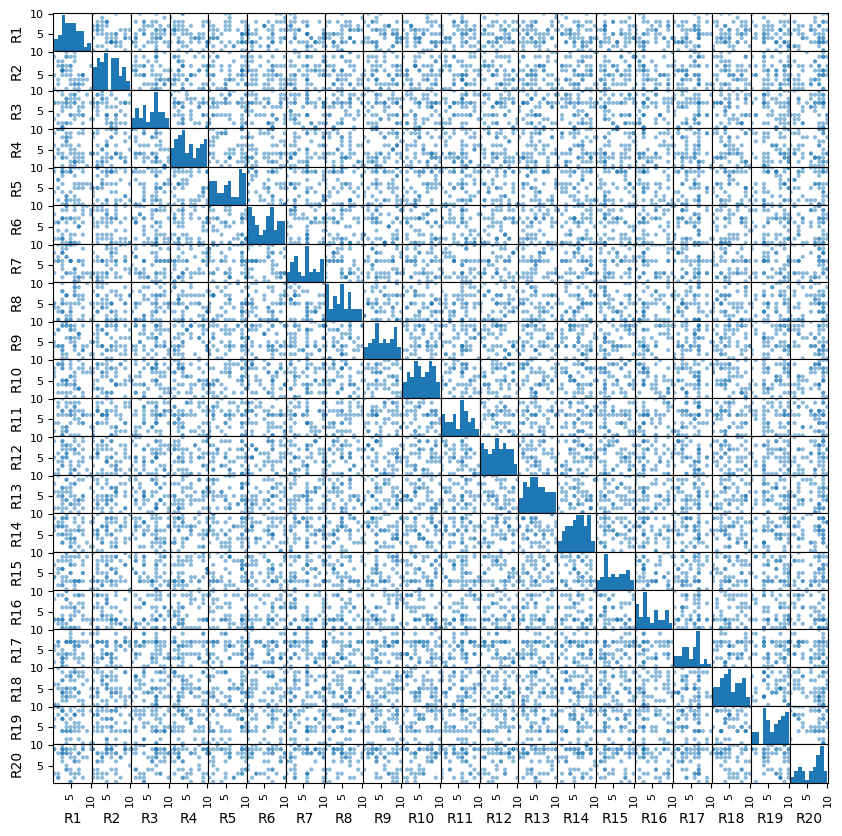

In [ ]:
df = get_dataframe()
df.describe()
scatter_plot(df)

In [ ]:
x_all = df.drop('R20',axis=1)
y_all = df['R20']

x_train,x_test,y_train,y_test = train_test_split(x_all,y_all,test_size=0.3,random_state=0)

In [ ]:
linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)
y_train_pred = linear_regression.predict(x_train)
y_test_pred = linear_regression.predict(x_test)

Intercept: 5.526560091415624
Coefficients:
      0         1
0    R1  0.609061
1    R2  0.655394
2    R3  0.266438
3    R4  0.405264
4    R5  0.284761
5    R6  0.304633
6    R7  0.147377
7    R8  0.078405
8    R9 -0.044866
9   R10  0.047906
10  R11  0.174797
11  R12 -0.087135
12  R13 -0.305411
13  R14 -0.151367
14  R15 -0.423329
15  R16 -0.570616
16  R17 -0.452575
17  R18 -0.129593
18  R19 -0.607027
RMSE train: 0.933, test: 3.428
R^2 train: 0.877, test: -0.472


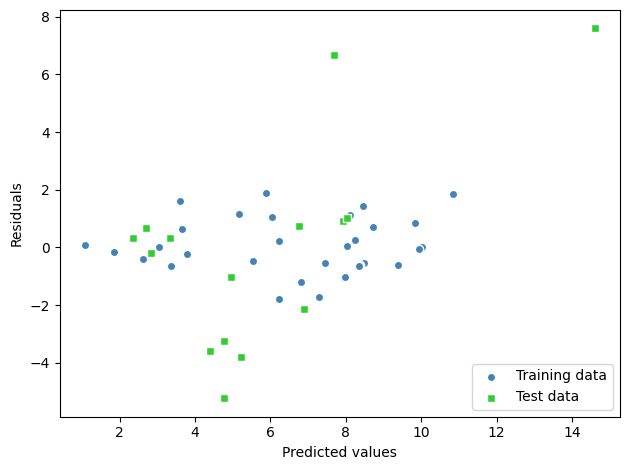

In [ ]:
print('Intercept: ' + str(linear_regression.intercept_))
print('Coefficients:')
print(pandas.DataFrame(zip(x_all.columns, linear_regression.coef_)))

analyze_prediction(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
tensorflow.keras.utils.set_random_seed(0)
ann = Sequential()
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1))

ann.compile(optimizer='adam', loss='mse', metrics=['mse'])
ann.fit(x_train,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 124.2695 - mse: 124.2695
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 105.1095 - mse: 105.1095
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 88.1046 - mse: 88.1046
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 73.6255 - mse: 73.6255
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 60.4790 - mse: 60.4790
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 49.7077 - mse: 49.7077
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 40.2840 - mse: 40.2840
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 32.6890 - mse: 32.6890
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 26.3340 - mse: 26.3340
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 21.4290 - mse: 21.4290
Epoch 11/100
2/2 [==============================] 

1/1 [==============================] - 0s 21ms/step
RMSE train: 2.098, test: 3.122
R^2 train: 0.379, test: -0.221


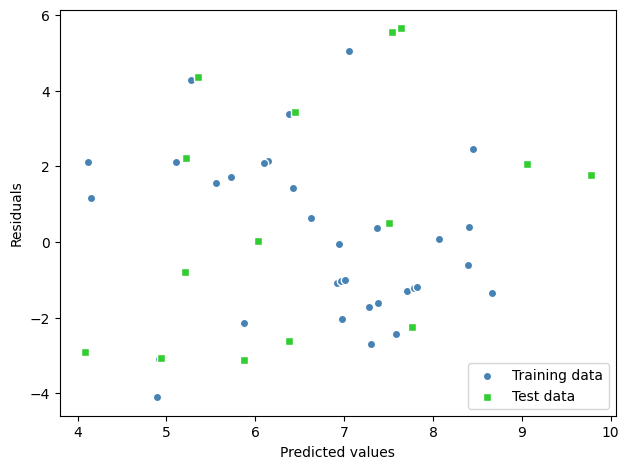

In [ ]:
y_train_pred = ann.predict(x_train).ravel()
y_test_pred = ann.predict(x_test).ravel()

analyze_prediction(y_train, y_train_pred, y_test, y_test_pred)
pyplot.show()

In [ ]:
tensorflow.keras.utils.set_random_seed(0)
dnn = Sequential()
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(1))

dnn.compile(optimizer='adam', loss='mse', metrics=['mse'])
dnn.fit(x_train,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 108.0306 - mse: 108.0306
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 91.1958 - mse: 91.1958
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 77.2257 - mse: 77.2257
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 66.0061 - mse: 66.0061
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 56.1554 - mse: 56.1554
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 48.0389 - mse: 48.0389
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 40.8133 - mse: 40.8133
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 34.8986 - mse: 34.8986
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 29.8825 - mse: 29.8825
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.6934 - mse: 25.6934
Epoch 11/100
2/2 [==============================] - 0s

1/1 [==============================] - 0s 36ms/step
RMSE train: 1.112, test: 2.867
R^2 train: 0.826, test: -0.030


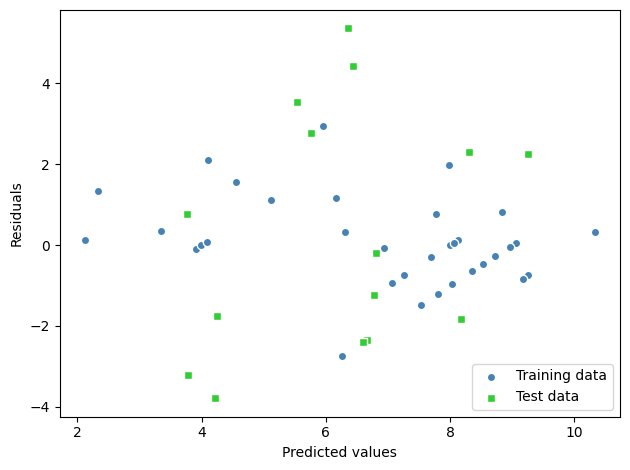

In [ ]:
y_train_pred = dnn.predict(x_train).ravel()
y_test_pred = dnn.predict(x_test).ravel()

analyze_prediction(y_train, y_train_pred, y_test, y_test_pred)